In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.5f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

✅ 최종 선정 컬럼

| Feature |
|---------|
| `AGE_GRP10` |
| `AGMT_END_SEG` |
| `BUNDLE_YN` |
| `CH_HH_AVG_MONTH1` |
| `CH_LAST_DAYS_BF_GRP` |
| `CONTENT_USE_YN` |
| `INHOME_RATE` |
| `MEDIA_NM_GRP` |
| `MONTHS_REMAINING` |
| `SCRB_PATH_NM_GRP` |
| `STB_RES_1M_YN` |
| `SVC_USE_DAYS_GRP` |
| `TOTAL_USED_DAYS` |
| `TV_I_CNT` |
| `VOC_STOP_CANCEL_MONTH1_YN` |
| `VOC_TOTAL_MONTH1_YN` |


#### 📌 모델 성능 비교 및 최종 모델 선정

##### 🔍 모델 성능 비교 결과
여러 가지 머신러닝 모델(로지스틱 회귀, 랜덤 포레스트, XGBoost, LightGBM, CatBoost 등)을 활용하여 **2차 선정된 피처들로 모델링을 진행**한 결과, 전반적으로 **LightGBM(LGBM)과 XGBoost 모델이 가장 우수한 성능을 보여주었음.**

##### ✅ **최종 모델 결정**
다양한 실험 결과를 바탕으로 **LightGBM과 XGBoost 모델을 최종적으로 선택**하여 모델링을 진행해 볼 예정!


---

최종 선정된 컬럼들로 이루어진 csv 파일 생성

In [3]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [4]:
df = df_real.filter(items=['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN', 'CH_HH_AVG_MONTH1',
                           'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN', 'INHOME_RATE', 'MEDIA_NM_GRP', 
                           'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP', 'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 
                           'TOTAL_USED_DAYS', 'TV_I_CNT', 'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
                           'p_mt', 'churn'])

In [5]:
df.to_csv("data/full_data/TPS_cancel_data_Final.csv", index=False)

---

In [4]:
df = pd.read_csv("data/full_data/TPS_cancel_data_Final.csv")

### LightGBM VS XGBoost

In [5]:
# 2월 ~ 9월 train
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [6]:
display(train, test)

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,10.00000,HD,13,I/B,N,12개월~24개월미만,733,3.00000,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72000,일주일내,N,0.00000,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00000,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86000,3주일전,N,10.00000,HD,11,I/B,N,24개월~ 36개월미만,794,3.00000,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95000,4주일전,N,10.00000,HD,10,I/B,N,24개월~ 36개월미만,825,3.00000,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03000,일주일내,N,0.00000,HD,9,I/B,N,24개월~ 36개월미만,855,3.00000,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.67000,일주일내,N,10.00000,HD,-37,현장경로,N,36개월 이상,2246,1.00000,N,N,5,N
21483372,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.14000,일주일내,N,10.00000,HD,-38,현장경로,N,36개월 이상,2276,1.00000,N,N,6,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,4.10000,일주일내,N,10.00000,HD,-39,현장경로,N,36개월 이상,2307,1.00000,N,N,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03000,일주일내,N,10.00000,HD,-40,현장경로,N,36개월 이상,2338,1.00000,N,N,8,N


,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,6.23000,일주일내,N,20.00000,HD,33,I/B,N,24개월~ 36개월미만,1008,3.00000,N,N,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,50대,약정만료전 6~9개월,Y,15.37000,일주일내,N,70.00000,HD,7,I/B,N,24개월~ 36개월미만,4402,2.00000,N,N,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,60대,약정만료전 12개월이상,Y,1.47000,일주일내,N,10.00000,HD,20,일반상담,N,36개월 이상,2641,6.00000,N,N,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,60대,약정만료후 9~12개월,N,2.16000,일주일내,N,10.00000,HD,-10,일반상담,N,36개월 이상,1989,3.00000,N,N,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,50대,약정만료후 12개월이상,Y,1.64000,일주일내,N,0.00000,HD,-51,현장경로,N,36개월 이상,3979,4.00000,N,Y,11,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.00000,HD,-48,현장경로,N,36개월 이상,3599,2.00000,N,N,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,40대,약정만료후 12개월이상,Y,1.81000,일주일내,N,10.00000,HD,-39,O/B,N,36개월 이상,2281,3.00000,N,N,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,30대,약정만료후 12개월이상,N,1.69000,일주일내,N,0.00000,HD,-109,일반상담,N,12개월~24개월미만,3958,2.00000,N,N,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,50대,약정만료전 12개월이상,Y,3.39000,일주일내,N,20.00000,UHD,19,I/B,N,36개월 이상,1552,2.00000,N,N,11,N


In [7]:
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32443
Y    0.67557
Name: proportion, dtype: float64

churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링

In [8]:
train = train.drop(columns = ['sha2_hash','p_mt'])

In [9]:
# 랜덤 시드 42로 설정하고 랜덤 언더 샘플링 진행
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [10]:
# 원본 데이터 churn 분포!
print("랜덤 언더 샘플링 전:")
print(y.value_counts())

# 랜덤 언더 샘플링 후, churn 분포!
print("\n랜덤 언더 샘플링 후:")
print(pd.Series(y_resampled).value_counts())

랜덤 언더 샘플링 전:
churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링 후:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [11]:
# y_resampled의 이름을 churn으로 명확하게 설정
y_resampled = pd.Series(y_resampled, name='churn')

# 그리고 X_resampled와 y_resampled 병합
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [12]:
display(resampled_data)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
9584974,60대,약정만료전 12개월이상,Y,5.89000,일주일내,N,30.00000,HD,17,O/B,N,36개월 이상,2812,3.00000,N,N,N
21276676,30대,약정만료후 12개월이상,Y,10.47000,일주일내,Y,50.00000,UHD,-40,일반상담,N,6개월~12개월미만,2326,2.00000,N,N,N
3206023,60대,약정만료전 12개월이상,N,10.28000,일주일내,N,60.00000,HD,28,I/B,N,6개월~12개월미만,3076,2.00000,N,N,N
12989342,50대,약정만료전 12개월이상,Y,2.09000,일주일내,N,10.00000,HD,20,일반상담,N,36개월 이상,3807,2.00000,N,N,N
17489377,90대이상,약정만료전 12개월이상,Y,0.33000,3주일전,N,0.00000,HD,19,O/B,N,12개월~24개월미만,3927,3.00000,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482271,60대,약정만료전 12개월이상,Y,1.90000,일주일내,N,0.00000,HD,30,일반상담,Y,36개월 이상,3712,2.00000,N,N,Y
21482420,30대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,0.00000,HD,20,O/B,Y,12개월~24개월미만,501,2.00000,N,N,Y
21482906,50대,약정만료전 12개월이상,Y,3.49000,일주일내,Y,0.00000,UHD,36,현장경로,Y,6개월미만,11,2.00000,N,Y,Y
21483095,50대,약정만료전 12개월이상,N,0.62000,일주일전,N,0.00000,HD,29,현장경로,N,6개월~12개월미만,231,1.00000,N,N,Y


In [13]:
train = resampled_data

LightGBM 학습

In [14]:
display(train)
display(test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
9584974,60대,약정만료전 12개월이상,Y,5.89000,일주일내,N,30.00000,HD,17,O/B,N,36개월 이상,2812,3.00000,N,N,N
21276676,30대,약정만료후 12개월이상,Y,10.47000,일주일내,Y,50.00000,UHD,-40,일반상담,N,6개월~12개월미만,2326,2.00000,N,N,N
3206023,60대,약정만료전 12개월이상,N,10.28000,일주일내,N,60.00000,HD,28,I/B,N,6개월~12개월미만,3076,2.00000,N,N,N
12989342,50대,약정만료전 12개월이상,Y,2.09000,일주일내,N,10.00000,HD,20,일반상담,N,36개월 이상,3807,2.00000,N,N,N
17489377,90대이상,약정만료전 12개월이상,Y,0.33000,3주일전,N,0.00000,HD,19,O/B,N,12개월~24개월미만,3927,3.00000,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482271,60대,약정만료전 12개월이상,Y,1.90000,일주일내,N,0.00000,HD,30,일반상담,Y,36개월 이상,3712,2.00000,N,N,Y
21482420,30대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,0.00000,HD,20,O/B,Y,12개월~24개월미만,501,2.00000,N,N,Y
21482906,50대,약정만료전 12개월이상,Y,3.49000,일주일내,Y,0.00000,UHD,36,현장경로,Y,6개월미만,11,2.00000,N,Y,Y
21483095,50대,약정만료전 12개월이상,N,0.62000,일주일전,N,0.00000,HD,29,현장경로,N,6개월~12개월미만,231,1.00000,N,N,Y


,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,6.23000,일주일내,N,20.00000,HD,33,I/B,N,24개월~ 36개월미만,1008,3.00000,N,N,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,50대,약정만료전 6~9개월,Y,15.37000,일주일내,N,70.00000,HD,7,I/B,N,24개월~ 36개월미만,4402,2.00000,N,N,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,60대,약정만료전 12개월이상,Y,1.47000,일주일내,N,10.00000,HD,20,일반상담,N,36개월 이상,2641,6.00000,N,N,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,60대,약정만료후 9~12개월,N,2.16000,일주일내,N,10.00000,HD,-10,일반상담,N,36개월 이상,1989,3.00000,N,N,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,50대,약정만료후 12개월이상,Y,1.64000,일주일내,N,0.00000,HD,-51,현장경로,N,36개월 이상,3979,4.00000,N,Y,11,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.00000,HD,-48,현장경로,N,36개월 이상,3599,2.00000,N,N,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,40대,약정만료후 12개월이상,Y,1.81000,일주일내,N,10.00000,HD,-39,O/B,N,36개월 이상,2281,3.00000,N,N,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,30대,약정만료후 12개월이상,N,1.69000,일주일내,N,0.00000,HD,-109,일반상담,N,12개월~24개월미만,3958,2.00000,N,N,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,50대,약정만료전 12개월이상,Y,3.39000,일주일내,N,20.00000,UHD,19,I/B,N,36개월 이상,1552,2.00000,N,N,11,N


In [15]:
# INHOME_RATE 컬럼은 object로

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [16]:
test = test.drop(columns=['sha2_hash','p_mt'])

In [17]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [18]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 AGE_GRP10 레이블 인코딩 매핑
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑
{'0.0': 0, '10.0': 1, '100.0': 2, '20.0': 3, '30.0': 4, '40.0': 5, '50.0': 6, '60.0': 7, '70.0': 8, '80.0': 9, '90.0': 10}
------------------------------
🔹 MEDIA_NM_GRP 레이블 인코딩 매핑
{'HD': 0, 'UHD': 1, '기타': 2}
-----------

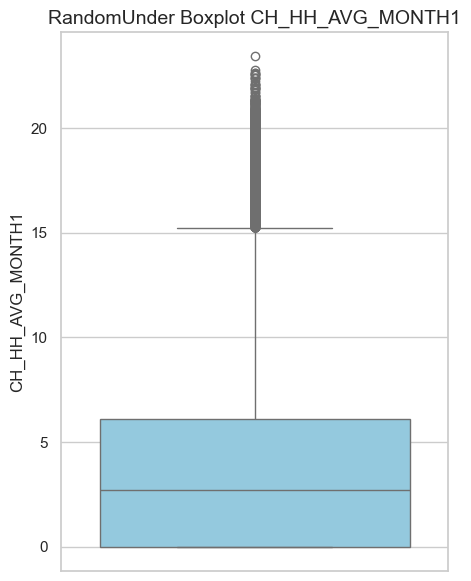

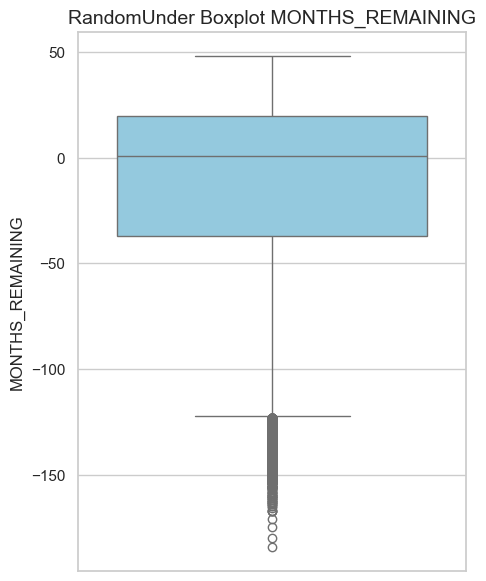

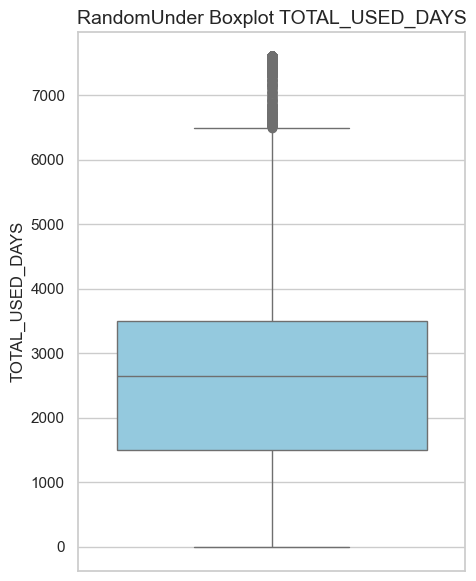

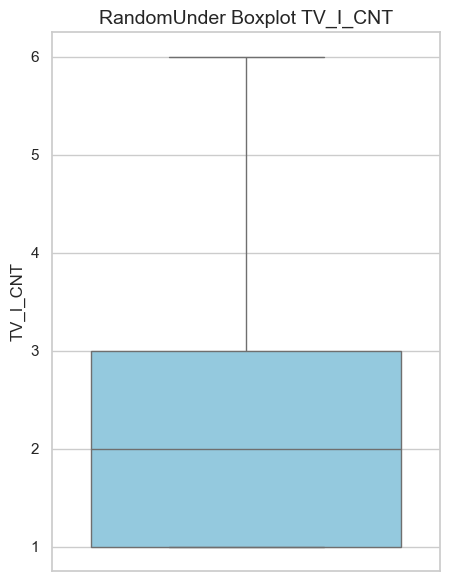

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# df에서 연속형(수치형) 변수 찾기
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [21]:
display(train, test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50000,0.07692,1.00000,0.52131,0.80000,0.00000,0.40000,0.00000,0.28070,0.11111,0.00000,0.50000,0.08521,0.40000,0.00000,0.00000,0
1,0.12500,0.61538,1.00000,1.27213,0.80000,1.00000,0.60000,0.50000,-0.71930,0.44444,0.00000,0.75000,-0.15840,0.20000,0.00000,0.00000,0
2,0.50000,0.07692,0.00000,1.24098,0.80000,0.00000,0.70000,0.00000,0.47368,0.00000,0.00000,0.75000,0.21754,0.20000,0.00000,0.00000,0
3,0.37500,0.07692,1.00000,-0.10164,0.80000,0.00000,0.10000,0.00000,0.33333,0.44444,0.00000,0.50000,0.58396,0.20000,0.00000,0.00000,0
4,0.87500,0.07692,1.00000,-0.39016,0.40000,0.00000,0.00000,0.00000,0.31579,0.11111,0.00000,0.00000,0.64411,0.40000,0.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,0.50000,0.07692,1.00000,-0.13279,0.80000,0.00000,0.00000,0.00000,0.50877,0.44444,1.00000,0.50000,0.53634,0.20000,0.00000,0.00000,1
211408,0.12500,0.07692,1.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,0.33333,0.11111,1.00000,0.00000,-1.07318,0.20000,0.00000,0.00000,1
211409,0.37500,0.07692,1.00000,0.12787,0.80000,1.00000,0.00000,0.50000,0.61404,1.00000,1.00000,1.00000,-1.31880,0.20000,0.00000,1.00000,1
211410,0.37500,0.07692,0.00000,-0.34262,1.00000,0.00000,0.00000,0.00000,0.49123,1.00000,0.00000,0.75000,-1.20852,0.00000,0.00000,0.00000,1


,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50000,0.07692,1.00000,0.57705,0.80000,0.00000,0.30000,0.00000,0.56140,0.00000,0.00000,0.25000,-0.81905,0.40000,0.00000,0.00000,0
1,0.37500,0.46154,1.00000,2.07541,0.80000,0.00000,0.80000,0.00000,0.10526,0.00000,0.00000,0.25000,0.88221,0.20000,0.00000,0.00000,0
2,0.50000,0.07692,1.00000,-0.20328,0.80000,0.00000,0.10000,0.00000,0.33333,0.44444,0.00000,0.50000,-0.00050,1.00000,0.00000,0.00000,0
3,0.50000,1.00000,0.00000,-0.09016,0.80000,0.00000,0.10000,0.00000,-0.19298,0.44444,0.00000,0.50000,-0.32732,0.40000,0.00000,0.00000,0
4,0.37500,0.61538,1.00000,-0.17541,0.80000,0.00000,0.00000,0.00000,-0.91228,1.00000,0.00000,0.50000,0.67018,0.60000,0.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,0.37500,0.61538,0.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,-0.85965,1.00000,0.00000,0.50000,0.47970,0.20000,0.00000,0.00000,0
1945588,0.25000,0.61538,1.00000,-0.14754,0.80000,0.00000,0.10000,0.00000,-0.70175,0.11111,0.00000,0.50000,-0.18095,0.40000,0.00000,0.00000,0
1945589,0.12500,0.61538,0.00000,-0.16721,0.80000,0.00000,0.00000,0.00000,-1.92982,0.44444,0.00000,0.00000,0.65965,0.20000,0.00000,0.00000,0
1945590,0.37500,0.07692,1.00000,0.11148,0.80000,0.00000,0.30000,0.50000,0.31579,0.00000,0.00000,0.50000,-0.54637,0.20000,0.00000,0.00000,0


LGBM 학습

In [24]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1559682  372734]
 [   3426    9750]]


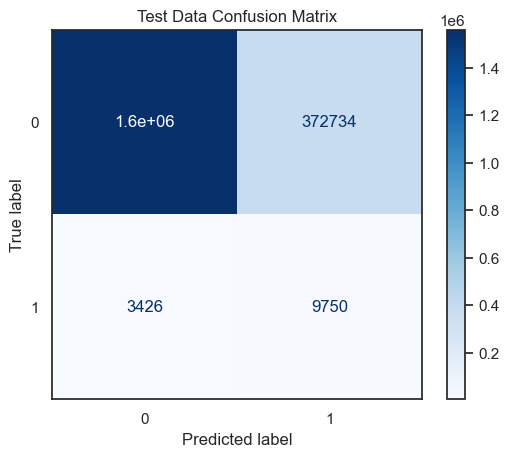

Test AUC-ROC: 0.85


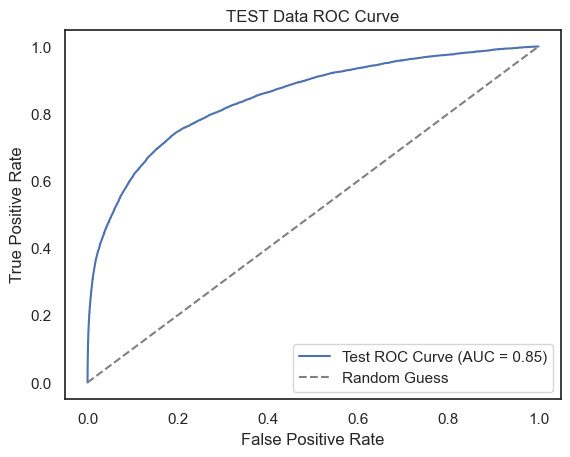

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

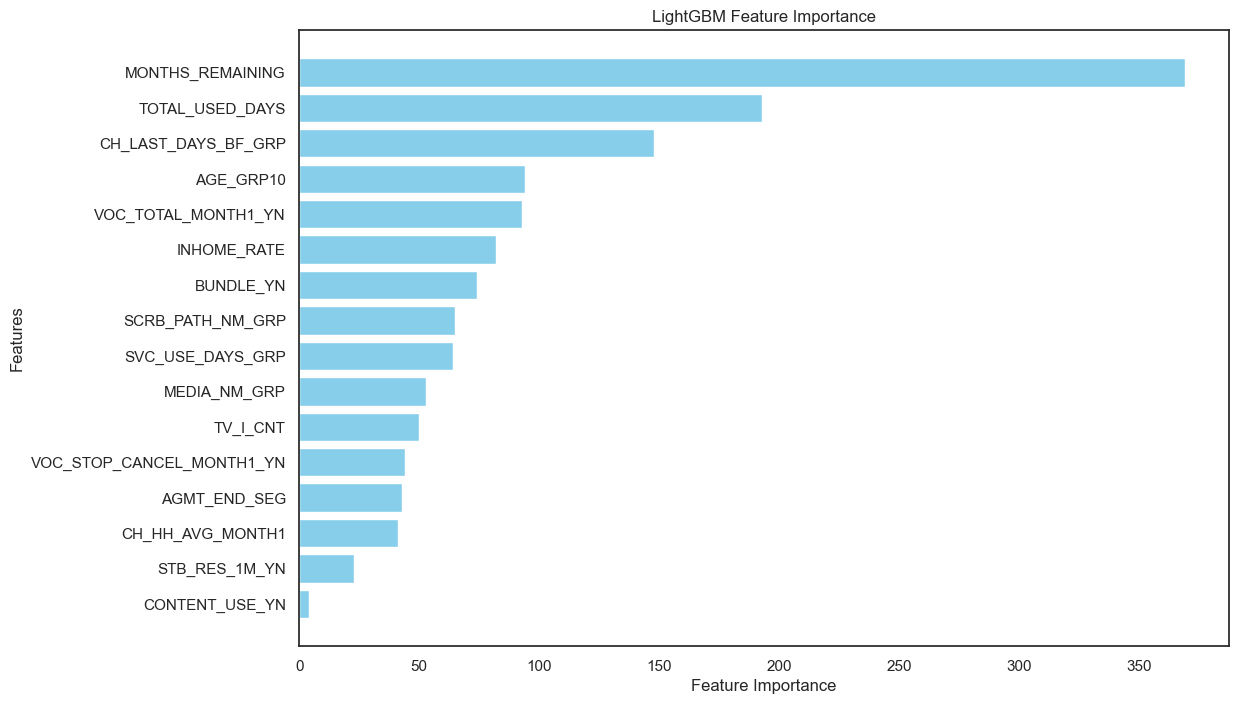

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

XGBoost 학습

In [29]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1572110  360306]
 [   3497    9679]]


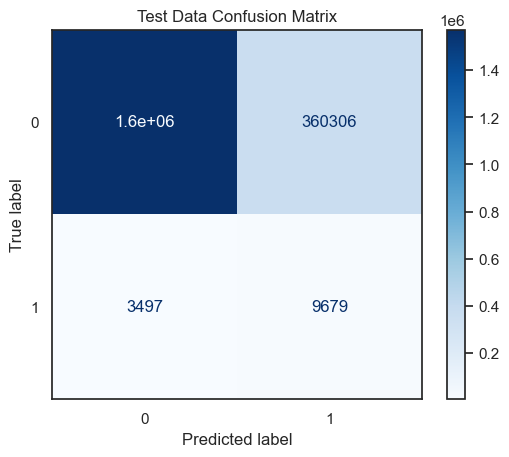

Test AUC-ROC: 0.85


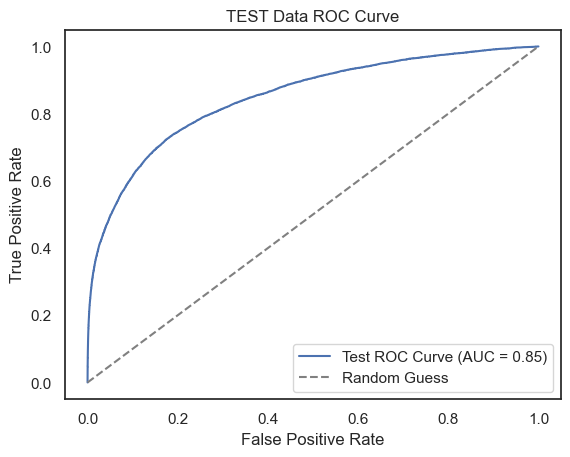

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = xgb_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

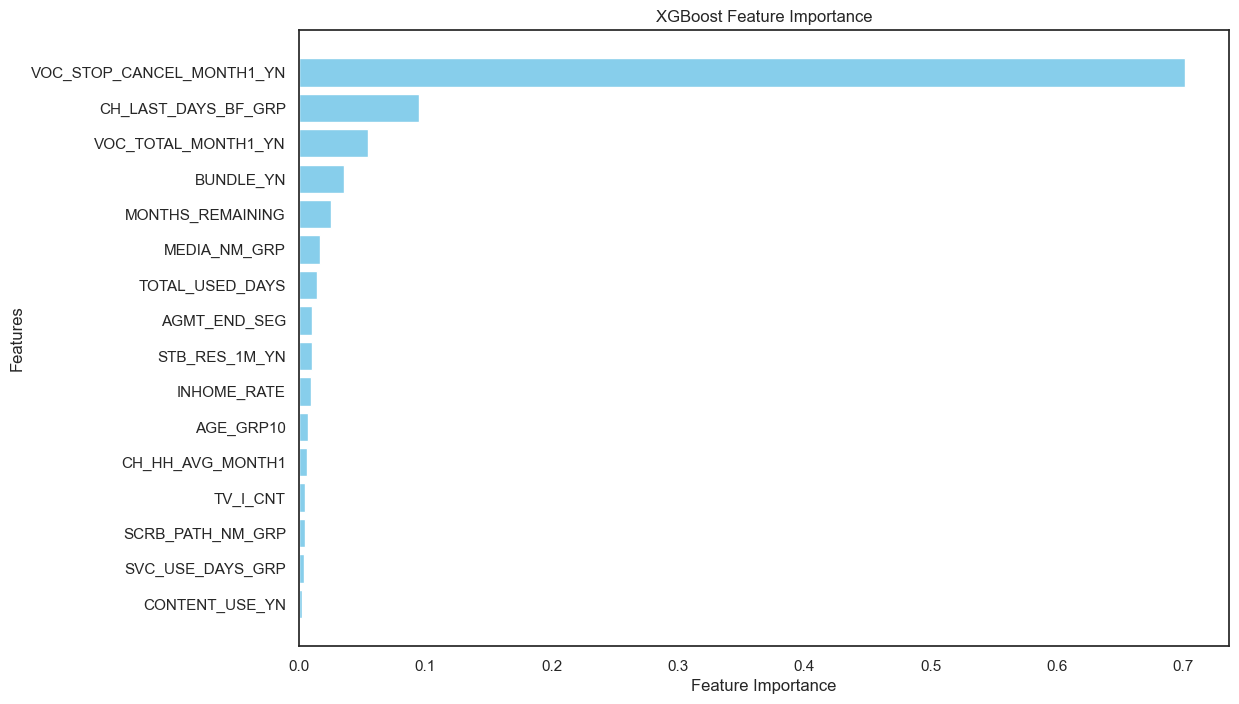

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

LGBM이 살짝 더 성능이 좋다고 나온다.<br><br>
둘의 성능이 비슷하다.

---

실제 상황에 대비해서, 5:5 비율이 아닌 7:3 비율 + 가중치를 해보는게 어떨까?
  - 해지 데이터는 특성상, 유지보다 해지가 더 적은 비율을 가지고 있다.

In [32]:
# 2월 ~ 9월 train
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [33]:
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [34]:
train = train.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

7:3 비율

In [35]:
from sklearn.utils import resample

# 데이터 분리
df_Y = train[train['churn'] == 'Y']
df_N = train[train['churn'] == 'N']

# Y의 데이터 개수와 비율에 따른 N의 샘플 개수 계산
y_count = len(df_Y)  # Y 데이터 개수
n_count_target = int((7 / 3) * y_count)  # 6:4 비율로 N 데이터 개수 계산

# N 데이터를 랜덤 샘플링
df_N_downsampled = resample(
    df_N,
    replace=False,  # 복원 샘플링 하지 않음
    n_samples=n_count_target,  # 목표 샘플 개수
    random_state=42  # 재현성을 위한 시드
)

# 언더샘플링된 데이터 결합
train_balanced = pd.concat([df_Y, df_N_downsampled])

# 결과 섞기 (선택 사항)
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print("최종 데이터 분포:")
print(train_balanced['churn'].value_counts())

train = train_balanced

최종 데이터 분포:
churn
N    246647
Y    105706
Name: count, dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [37]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 AGE_GRP10 레이블 인코딩 매핑
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑
{'0.0': 0, '10.0': 1, '100.0': 2, '20.0': 3, '30.0': 4, '40.0': 5, '50.0': 6, '60.0': 7, '70.0': 8, '80.0': 9, '90.0': 10}
------------------------------
🔹 MEDIA_NM_GRP 레이블 인코딩 매핑
{'HD': 0, 'UHD': 1, '기타': 2}
-----------

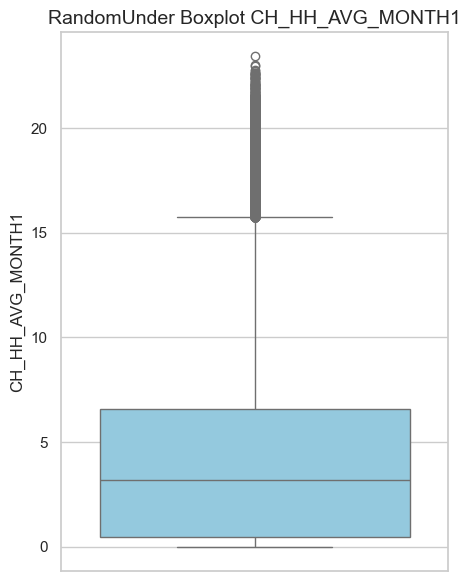

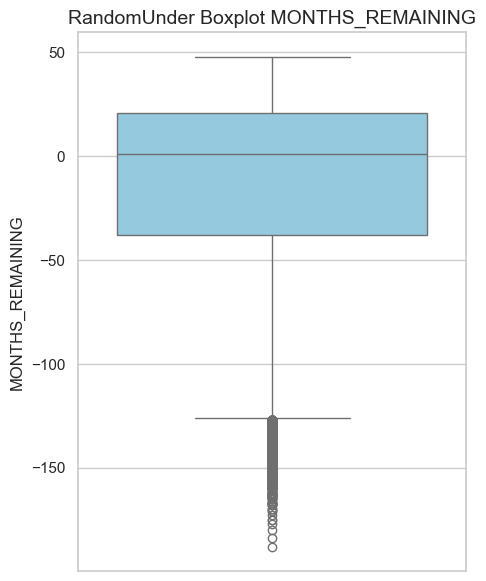

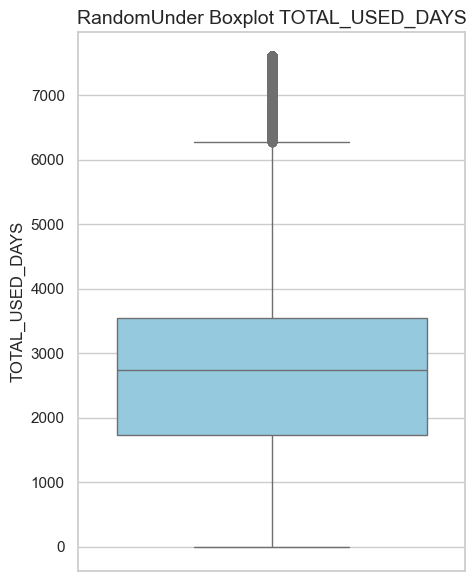

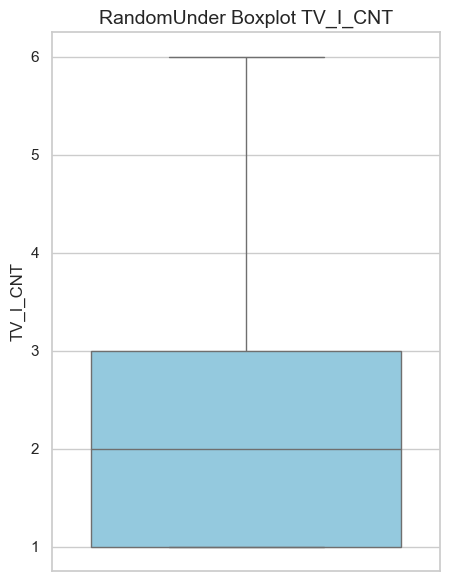

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# df에서 연속형(수치형) 변수 찾기
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


LightGBM

In [43]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1563375  369041]
 [   3432    9744]]


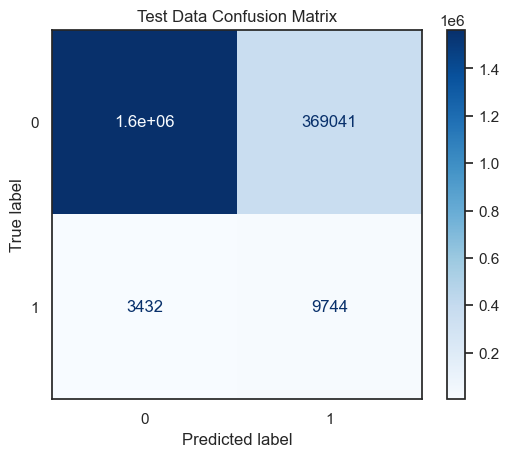

Test AUC-ROC: 0.85


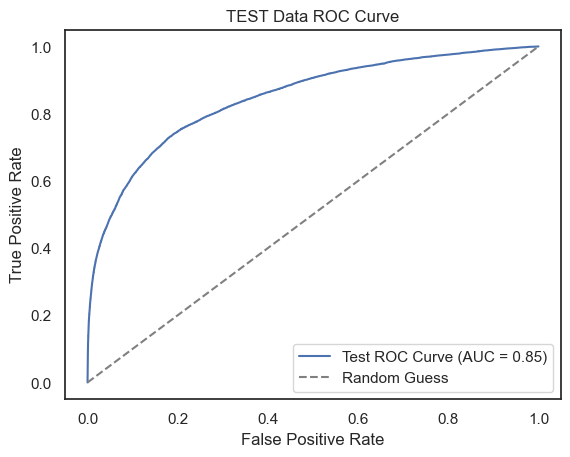

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

XGBoost 학습

In [53]:
from xgboost import XGBClassifier

# scale_pos_weight(가중치)를 5, 10, 50, 100, 150, 160 등을 진행해봄
# xgboost는 class_weight = 'balanced'를 지원하지 않음!

X_train = train.drop(columns=['churn'])
y_train = train['churn']

xgb_model = XGBClassifier(
    n_estimators=5,
    max_depth=6,
    learning_rate=0.1,
    # 가중치
    scale_pos_weight=2,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.86

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1932416
           1       0.03      0.66      0.06     13176

    accuracy                           0.86   1945592
   macro avg       0.51      0.76      0.49   1945592
weighted avg       0.99      0.86      0.92   1945592


Confusion Matrix (테스트 데이터):
[[1659504  272912]
 [   4460    8716]]


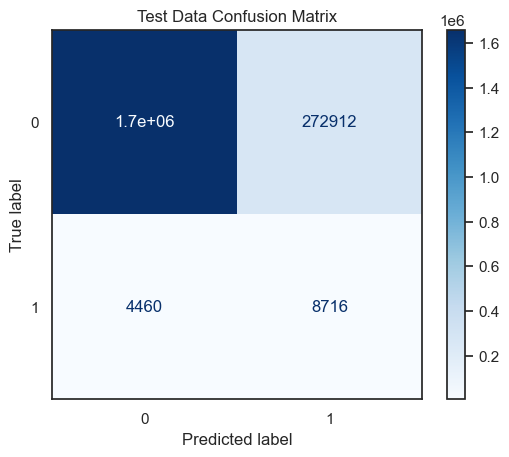

Test AUC-ROC: 0.83


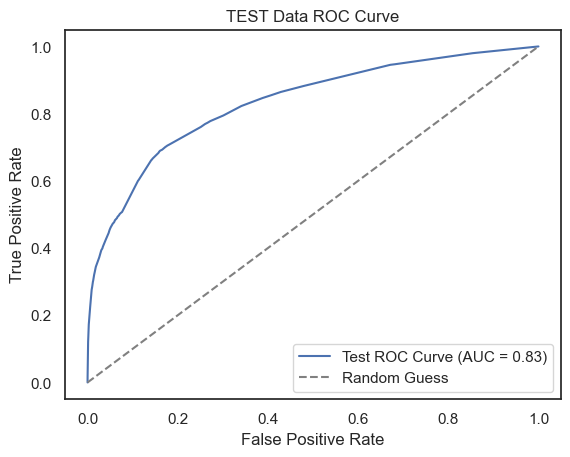

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = xgb_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

현재까지는, LGBM 랜덤 언더 샘플링일 때, 좋은 성능을 보이고 있음

---

앙상블 모델을 적용해보자.   
LightGBM이 좀 더 모델에 영향을 있게 앙상블 진행

In [56]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성 및 학습
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    scale_pos_weight=np.bincount(y_train)[0] / np.bincount(y_train)[1],  # 클래스 불균형 보정
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# -----------------------------------------------------------
# 예측 (Validation 데이터)
# -----------------------------------------------------------
# 개별 모델 확률 예측
lgbm_preds = lgbm_model.predict_proba(X_test)[:, 1]  # LightGBM 확률 예측
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]    # XGBoost 확률 예측

# ✅ LightGBM의 영향을 더 크게 반영한 가중 평균 앙상블
ensemble_preds = (0.8 * lgbm_preds) + (0.2 * xgb_preds)

# 최종 예측 (Threshold = 0.5)
final_preds = (ensemble_preds >= 0.5).astype(int)


Test Accuracy: 0.92

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1932416
           1       0.05      0.57      0.09     13176

    accuracy                           0.92   1945592
   macro avg       0.52      0.75      0.52   1945592
weighted avg       0.99      0.92      0.95   1945592


Confusion Matrix (Test):
[[1782753  149663]
 [   5685    7491]]


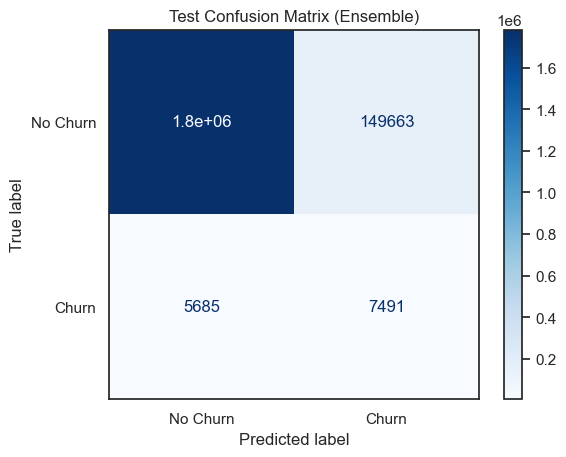

Test AUC-ROC: 0.85


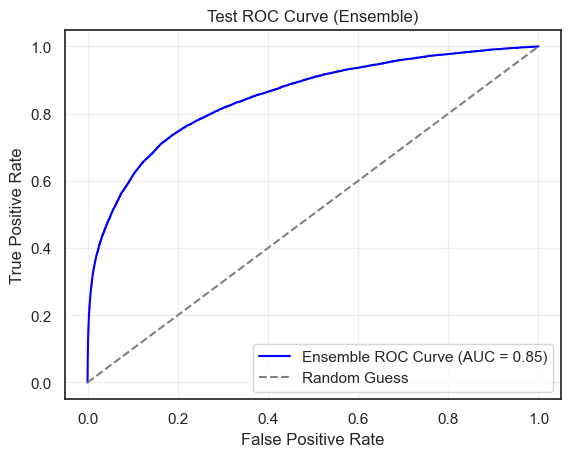

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 초기화
sns.set_style("white")

# 테스트 데이터
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 앙상블 모델 예측 및 평가 (테스트 데이터)
# -----------------------------------------------------------
# 개별 모델 확률 예측
lgbm_preds = lgbm_model.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]

# 앙상블 확률 예측 (LightGBM 0.8 + XGBoost 0.2)
ensemble_preds_proba = (0.8 * lgbm_preds) + (0.2 * xgb_preds)

# 최종 예측 (Threshold = 0.5)
ensemble_preds = (ensemble_preds_proba >= 0.5).astype(int)

# 정확도 확인
test_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Test):")
print(classification_report(y_test, ensemble_preds))

# Confusion Matrix
print("\nConfusion Matrix (Test):")
conf_matrix = confusion_matrix(y_test, ensemble_preds)
print(conf_matrix)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp_test.plot(cmap="Blues")
plt.title("Test Confusion Matrix (Ensemble)")
plt.show()

# -----------------------------------------------------------
# AUC-ROC 계산 및 시각화
# -----------------------------------------------------------
test_auc = roc_auc_score(y_test, ensemble_preds_proba)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 계산
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ensemble_preds_proba)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Ensemble ROC Curve (AUC = {test_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve (Ensemble)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---

### 📌 최종 결론: 랜덤 언더샘플링 적용한 LightGBM 모델이 가장 좋았음

---

#### ✅ 1. 모델 선택 과정
- 여러 모델 (**XGBoost**, **CatBoost**, **LightGBM** 등)을 평가한 결과,  
  **랜덤 언더샘플링을 적용한 LightGBM 모델이 가장 뛰어난 성능을 기록**함
- XGBoost와 비교 시,   
  **랜덤 언더샘플링 기반의 LightGBM 모델이 더 좋은 예측 성능**을 보임.(미세한 차이)

---

### 🔍 2. 랜덤 언더샘플링을 적용한 이유

#### 🔹 클래스 불균형 문제 해결
- 기존 데이터는 **해지 고객(1)에 비해 유지 고객(0)이 훨씬 많은 불균형 상태**!
- 이로 인해 모델이 유지(0) 고객에 치우쳐,  
  **해지 고객(1)을 제대로 예측하지 못하는 문제가 있었음**

#### 🔹 랜덤 언더샘플링의 효과
- 랜덤 언더샘플링으로 유지 고객(0)의 수를 줄여,  
  클래스 불균형을 완화하여 **해지 고객(1) 예측 성능을 향상**시킴
- 그 결과, **FN(False Negative, 실제 해지 고객을 유지로 잘못 예측하는 경우)을 효과적으로 감소**시킬 수 있었음!

#### 🔹 FN 감소의 비즈니스적 중요성
- **FN을 낮추는 것이 FP(False Positive)를 낮추는 것보다 중요**하다고 생각
- FP는 경고 등 간단한 조치로 대응 가능하지만,  
  FN은 실제 고객 이탈로 이어져 **직접적인 손실을 유발**하기 때문!!!!!

---

### 🚀 3. 최종 요약
- **랜덤 언더샘플링을 적용한 LightGBM 모델이 가장 우수**
- FN을 효과적으로 감소시키며, 실제 비즈니스 적용성 또한 매우 높음
